In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt
import os
import zipfile
%matplotlib inline
# Set random seed
np.random.seed(0)

In [2]:
file = "archive (5).zip"  
data = zipfile.ZipFile(file,'r')
data.extractall("Spotify")

In [3]:
data = pd.read_csv("Spotify/dataset-of-90s.csv")
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0
3,Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0


In [4]:
 data.target.value_counts()

1    2760
0    2760
Name: target, dtype: int64

In [5]:
data = data.sample(frac=1)
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
5253,Mètché Dershé (When Am I Going to Reach There?),Mulatu Astatke,spotify:track:4MpyYQeDHw3wHb4VNTbWQY,0.632,0.513,7,-8.922,1,0.0351,0.78300,0.482000,0.215,0.383,126.359,240187,4,30.75284,13,0
1902,Can't Truss It,Public Enemy,spotify:track:5r5uZvXHbE4X6CdhnSATtX,0.802,0.872,11,-7.651,1,0.1390,0.00196,0.000000,0.132,0.607,101.664,321573,4,30.72992,12,1
405,On Bended Knee,Boyz II Men,spotify:track:7MYmo0JJJDmu4MZTSAF9y3,0.631,0.516,8,-8.225,1,0.0353,0.41300,0.000000,0.115,0.180,116.654,329800,4,43.33309,14,1
5390,Who Cares,Stan Getz,spotify:track:23FzH0YCzfSTwq0aFoKa1o,0.505,0.294,0,-17.080,1,0.0332,0.80700,0.069200,0.106,0.582,105.628,421000,4,39.24387,18,0
142,Suspicious (West Coast Experimental Pop Art Mix),Psychic TV,spotify:track:4As0uOWi3MhnuaKfkm2eC2,0.311,0.255,0,-17.118,1,0.0336,0.68900,0.000645,0.119,0.182,96.419,446107,3,71.80261,15,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5520 entries, 5253 to 2732
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             5520 non-null   object 
 1   artist            5520 non-null   object 
 2   uri               5520 non-null   object 
 3   danceability      5520 non-null   float64
 4   energy            5520 non-null   float64
 5   key               5520 non-null   int64  
 6   loudness          5520 non-null   float64
 7   mode              5520 non-null   int64  
 8   speechiness       5520 non-null   float64
 9   acousticness      5520 non-null   float64
 10  instrumentalness  5520 non-null   float64
 11  liveness          5520 non-null   float64
 12  valence           5520 non-null   float64
 13  tempo             5520 non-null   float64
 14  duration_ms       5520 non-null   int64  
 15  time_signature    5520 non-null   int64  
 16  chorus_hit        5520 non-null   float

In [7]:
data.drop(["track","artist","uri"],axis=1,inplace=True)

In [8]:
unscaled_inputs = data.iloc[:,0:-1]
target = data.iloc[:,[-1]]

In [9]:
scaled_inputs = preprocessing.scale(unscaled_inputs)
scaled_inputs

array([[ 0.36098971, -0.35391869,  0.49470991, ...,  0.21981357,
        -0.51387208,  0.41736857],
       [ 1.3035659 ,  1.06974454,  1.63396677, ...,  0.21981357,
        -0.51502154,  0.1943842 ],
       [ 0.35544514, -0.34202178,  0.77952412, ...,  0.21981357,
         0.11703873,  0.64035294],
       ...,
       [-1.64059856,  1.37906413, -0.07491852, ...,  0.21981357,
         1.10771952, -1.14352202],
       [ 0.11148424,  0.38368956, -0.92936117, ...,  0.21981357,
        -0.82875902,  0.1943842 ],
       [-0.71465607,  1.20061052,  1.06433834, ...,  0.21981357,
        -0.38342709, -0.69755328]])

In [10]:
samples_count = scaled_inputs.shape[0]
samples_count

5520

In [11]:
train_samples_count = int(0.8*samples_count)
validation_samples_count = int(0.1*samples_count)
test_samples_count = samples_count - train_samples_count - validation_samples_count

In [12]:
# train:
train_inputs = scaled_inputs[:train_samples_count]
train_targets = target[:train_samples_count]

In [13]:
# validation:
validation_inputs = scaled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = target[train_samples_count:train_samples_count+validation_samples_count]

In [14]:
# test:
test_inputs = scaled_inputs[train_samples_count+validation_samples_count:]
test_targets = target[train_samples_count+validation_samples_count:]

In [15]:
# Print the number of targets that are 1s, the total number of samples, and the proportion for training, validation, and test.
print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)
print(np.sum(test_targets), test_samples_count, np.sum(test_targets) / test_samples_count)

target    2180
dtype: int64 4416 target    0.493659
dtype: float64
target    297
dtype: int64 552 target    0.538043
dtype: float64
target    283
dtype: int64 552 target    0.512681
dtype: float64


In [16]:
# Save the three datasets in *.npz.
# We will see that it is extremely valuable to name them in such a coherent way!

np.savez('Spotify_data_train', inputs=train_inputs, targets=train_targets)
np.savez('Spotify_data_validation', inputs=validation_inputs, targets=validation_targets)
np.savez('Spotify_data_test', inputs=test_inputs, targets=test_targets)

In [17]:
npz = np.load('Spotify_data_train.npz')
# we extract the inputs using the keyword under which we saved them
# to ensure that they are all floats, let's also take care of that
train_inputs = npz['inputs'].astype(np.float)
# targets must be int because of sparse_categorical_crossentropy (we want to be able to smoothly one-hot encode them)
train_targets = npz['targets'].astype(np.int)

# we load the validation data in the temporary variable
npz = np.load('Spotify_data_validation.npz')
# we can load the inputs and the targets in the same line
validation_inputs, validation_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

# we load the test data in the temporary variable
npz = np.load('Spotify_data_test.npz')
# we create 2 variables that will contain the test inputs and the test targets
test_inputs, test_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

In [18]:
# Set the input and output sizes
input_size = 15 # count of features
output_size = 2 # count of targets
# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 50 # counts of neurons
    
# define how the model will look like
model = tf.keras.Sequential([
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 3nd hidden layer
    # the final layer is no different, we just make sure to activate it with softmax
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])

In [19]:
# we define the optimizer we'd like to use, 
# the loss function, 
# and the metrics we are interested in obtaining at each iteration
#custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
# That's where we train the model we have built.
# set the batch size
batch_size = 300
# set a maximum number of training epochs
max_epochs = 20

# fit the model
# note that this time the train, validation and test data are not iterable
history = model.fit(  train_inputs, # train inputs
                      train_targets, # train targets
                      batch_size=batch_size, # batch size
                      epochs=max_epochs, # epochs that we will train for (assuming early stopping doesn't kick in)
                      # callbacks are functions called by a task when a task is completed
                      # task here is to check if val_loss is increasing
                      #callbacks=[early_stopping], # early stopping
                      validation_data=(validation_inputs, validation_targets), # validation data
                      verbose = 2 # making sure we get enough information about the training process
          )  

Epoch 1/20
15/15 - 1s - loss: 0.6552 - accuracy: 0.5772 - val_loss: 0.5758 - val_accuracy: 0.7228
Epoch 2/20
15/15 - 0s - loss: 0.5291 - accuracy: 0.7403 - val_loss: 0.4827 - val_accuracy: 0.7754
Epoch 3/20
15/15 - 0s - loss: 0.4507 - accuracy: 0.7953 - val_loss: 0.4385 - val_accuracy: 0.7899
Epoch 4/20
15/15 - 0s - loss: 0.4103 - accuracy: 0.8175 - val_loss: 0.4217 - val_accuracy: 0.8007
Epoch 5/20
15/15 - 0s - loss: 0.3918 - accuracy: 0.8277 - val_loss: 0.4195 - val_accuracy: 0.8025
Epoch 6/20
15/15 - 0s - loss: 0.3807 - accuracy: 0.8315 - val_loss: 0.4129 - val_accuracy: 0.8134
Epoch 7/20
15/15 - 0s - loss: 0.3721 - accuracy: 0.8347 - val_loss: 0.4042 - val_accuracy: 0.8134
Epoch 8/20
15/15 - 0s - loss: 0.3632 - accuracy: 0.8406 - val_loss: 0.4079 - val_accuracy: 0.8207
Epoch 9/20
15/15 - 0s - loss: 0.3571 - accuracy: 0.8456 - val_loss: 0.4042 - val_accuracy: 0.8225
Epoch 10/20
15/15 - 0s - loss: 0.3511 - accuracy: 0.8487 - val_loss: 0.4029 - val_accuracy: 0.8243
Epoch 11/20
15/15 -

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                800       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 102       
Total params: 6,002
Trainable params: 6,002
Non-trainable params: 0
_________________________________________________________________


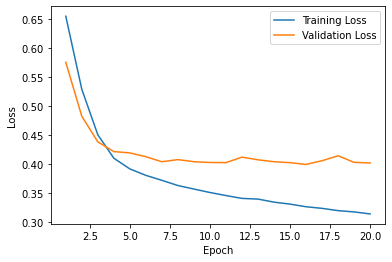

In [22]:
# Get training and test loss histories
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss)
plt.plot(epoch_count, validation_loss)
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [23]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets, verbose = 0)
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

Test loss: 0.39. Test accuracy: 84.96%
